<a href="https://colab.research.google.com/github/JayellWolfe/EarthQuakes/blob/master/EarthQuake_HeatMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 8 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (167 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1bu

In [2]:
!pip install pyproj==1.9.6

     |████████████████████████████████| 2.8MB 2.9MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702053 sha256=91441175d0269450c4c263113b76d8f618f1bffc8483a9c18bc1fed9d9dc6870
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.4.0
    Uninstalling pyproj-2.4.0:
      Successfully uninstalled pyproj-2.4.0


In [0]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import csv
import io
from csv import DictReader
import pandas as pd


In [18]:
# loading the dataset in a dataframe

DATA_URL = 'http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_month.csv'
print("Downloading", DATA_URL)
data = requests.get(DATA_URL).content

df = pd.read_csv(io.StringIO(data.decode('utf-8')))

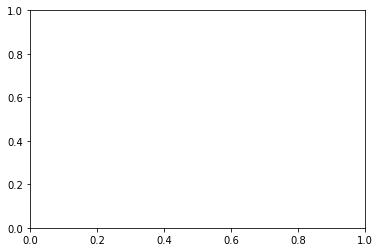

In [19]:
# creating the basic plots

fig, ax = plt.subplots()
earth = Basemap(ax=ax)

In [20]:
# creating the earth map

earth.drawcoastlines(color='#555566', linewidth=1)

In [21]:
# plotting the data on the map

ax.scatter(df['longitude'], df['latitude'], df['mag'] ** 2, c='red', alpha=0.5, zorder=10)

In [0]:
# saving the plot

ax.set_xlabel("M4.5 earthquakes in the past 30 days from March 5, 2019 (USGS)")
fig.savefig('usgs-4.5m-plain.png', dpi=350)
earth.bluemarble(alpha=0.42)
fig.savefig('usgs-4.5m-earth.png', dpi=350)

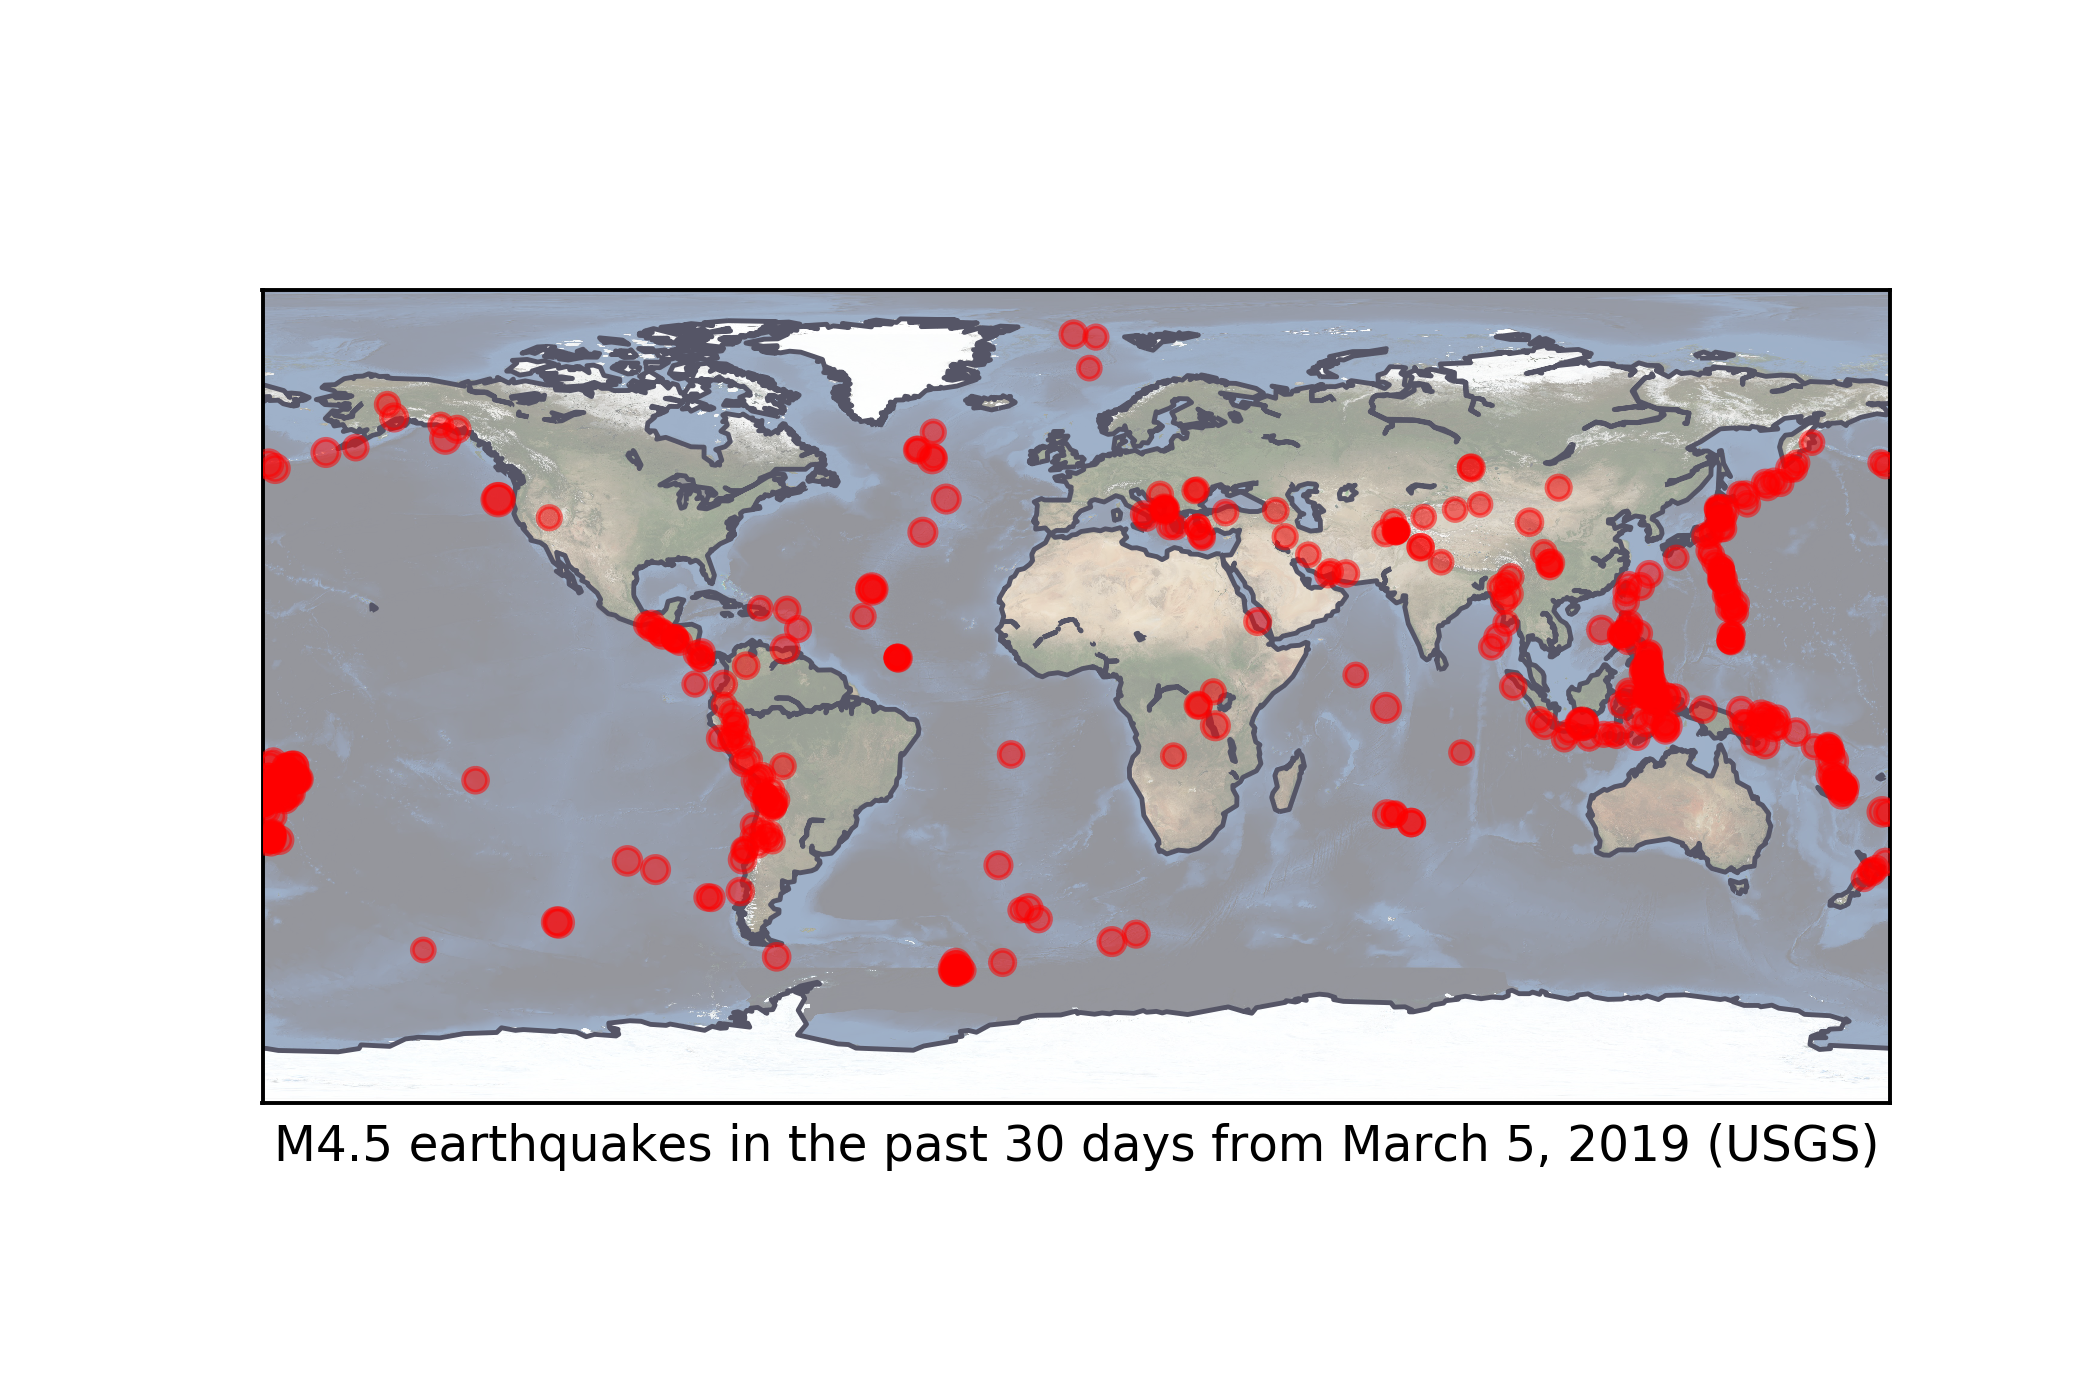

In [23]:
from IPython.display import Image
Image('usgs-4.5m-earth.png')

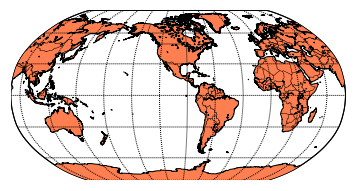

In [24]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='robin', lat_0=0, lon_0=-100,
              resolution='l', area_thresh=1000.0)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='coral')
my_map.drawmapboundary()
 
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))
 
plt.show()

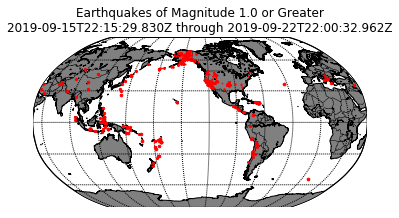

In [39]:
import csv

# Open the earthquake data file.
filename = 'earthquake_data.csv.csv'

# Create empty lists for the data we are interested in.
lats, lons = [], []
magnitudes = []
timestrings = []
# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(filename) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[1]))
        lons.append(float(row[2]))
        magnitudes.append(float(row[4]))
        timestrings.append(row[0])
# --- Build Map ---
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
 
min_marker_size = .5
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = eq_map(lon, lat)
    msize = mag * min_marker_size
    eq_map.plot(x, y, 'ro', markersize=msize)
 
title_string = "Earthquakes of Magnitude 1.0 or Greater\n"
title_string += "%s through %s" % (timestrings[-1], timestrings[0])
plt.title(title_string)

plt.show()

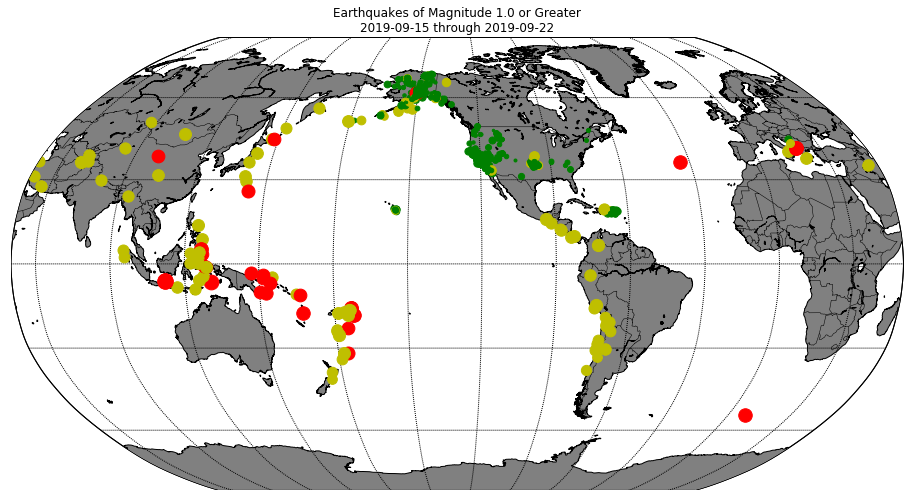

In [44]:
import csv

# Open the earthquake data file.
filename = 'earthquake_data.csv.csv'

# Create empty lists for the data we are interested in.
lats, lons = [], []
magnitudes = []
timestrings = []

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(filename) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[1]))
        lons.append(float(row[2]))
        magnitudes.append(float(row[4]))
        timestrings.append(row[0])
        
# --- Build Map ---
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 5.0:
        return ('yo')
    else:
        return ('ro')

# Make this plot larger.
plt.figure(figsize=(16,12))

eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
 
min_marker_size = 2.5
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = eq_map(lon, lat)
    msize = mag * min_marker_size
    marker_string = get_marker_color(mag)
    eq_map.plot(x, y, marker_string, markersize=msize)
    
title_string = "Earthquakes of Magnitude 1.0 or Greater\n"
title_string += "%s through %s" % (timestrings[-1][:10], timestrings[0][:10])
plt.title(title_string)

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


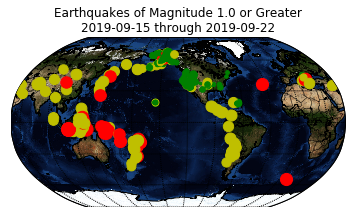

In [46]:
import csv

# Open the earthquake data file.
filename = 'earthquake_data.csv.csv'

# Create empty lists for the data we are interested in.
lats, lons = [], []
magnitudes = []
timestrings = []

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(filename) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[1]))
        lons.append(float(row[2]))
        magnitudes.append(float(row[4]))
        timestrings.append(row[0])
        
# --- Build Map ---
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 5.0:
        return ('yo')
    else:
        return ('ro')
 
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
#eq_map.fillcontinents(color = 'gray')
eq_map.bluemarble()
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
 
min_marker_size = 2.25
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = eq_map(lon, lat)
    msize = mag * min_marker_size
    marker_string = get_marker_color(mag)
    eq_map.plot(x, y, marker_string, markersize=msize)
    
title_string = "Earthquakes of Magnitude 1.0 or Greater\n"
title_string += "%s through %s" % (timestrings[-1][:10], timestrings[0][:10])
plt.title(title_string)
 
plt.show()